# Predicting the price of houses in Ames using Artificial Intelligence and Machine Learning

In this notebook, we will go through the Ames housing dataset to predict the sale price of a house.

# 1. Problem Definition

How well can we predict the future sale price of a house in Ames, Iowa given its characteristics?

# 2. Data

The data is downloaded from Kaggle. The dataset has 82 columns and about 2930 rows which we will split using `train_test_split` after completing our data cleanup and analysis.

# 3. Evaluation Metrics

Since this is a regression problem we would like to use a metric to show how good our model is. I will try to get the highest $ R^2 $ possible, hopefully above 0.8.

We will also have a look at other accuracy metrics and try to optimize our model using it.

# 4. Features

There are a lot of features in this dataset. 82 to be precise, I will go through the features while providing a small description.

* Order: Observation number
* PID: Parcel identification number - can be used with city web site for parcel review.
* MS SubClass: Identifies the type of dwelling involved in the sale.
* MS Zoning: Identifies the general zoning classification of the sale.
* Lot Frontage: Linear feet of street connected to property
* Lot Area: Lot size in square feet
* Street: Type of road access to property
* Alley: Type of alley access to property
* Lot Shape: General shape of property
* Land Contour: Flatness of the property
* Utilities: Type of utilities available
* Lot Config: Lot configuration
* Land Slope: Slope of property
* Neighborhood: Physical locations within Ames city limits (map available)
* Condition 1: Proximity to various conditions
* Condition 2: Proximity to various conditions (if more than one is present)
* Bldg Type: Type of dwelling
* House Style: Style of dwelling
* Overall Qual: Rates the overall material and finish of the house
* Overall Cond: Rates the overall condition of the house
* Year Built: Original construction date
* Year Remod/Add: Remodel date (same as construction date if no remodeling or additions)
* Roof Style: Type of roof
* Roof Matl: Roof material
* Exterior 1: Exterior covering on house
* Exterior 2: Exterior covering on house (if more than one material)
* Mas Vnr Type: Masonry veneer type
* Mas Vnr Area: Masonry veneer area in square feet
* Exter Qual: Evaluates the quality of the material on the exterior
* Exter Cond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* Bsmt Qual: Evaluates the height of the basement
* Bsmt Cond: Evaluates the general condition of the basement
* Bsmt Exposure: Refers to walkout or garden level walls
* BsmtFin Type 1: Rating of basement finished area
* BsmtFin SF 1: Type 1 finished square feet
* BsmtFinType 2: Rating of basement finished area (if multiple types)
* BsmtFin SF 2: Type 2 finished square feet
* Bsmt Unf SF: Unfinished square feet of basement area
* Total Bsmt SF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* Central Air: Central air conditioning
* Electrical: Electrical system
* 1st Flr SF: First Floor square feet
* 2nd Flr SF: Second floor square feet
* Low Qual Fin SF: Low quality finished square feet (all floors)
* Gr Liv Area: Above grade (ground) living area square feet
* Bsmt Full Bath: Basement full bathrooms


* Bsmt Half Bath: Basement half bathrooms
* Full Bath: Full bathrooms above grade
* Half Bath: Half baths above grade
* Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
* Kitchen: Kitchens above grade
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality (Assume typical unless deductions are warranted)
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* Garage Type: Garage location
* Garage Yr Blt: Year garage was built
* Garage Finish: Interior finish of the garage
* Garage Cars: Size of garage in car capacity
* Garage Area: Size of garage in square feet
* Garage Qual: Garage quality
* Garage Cond: Garage condition
* Paved Drive: Paved driveway
* Wood Deck SF: Wood deck area in square feet
* Open Porch SF: Open porch area in square feet
* Enclosed Porch: Enclosed porch area in square feet
* 3-Ssn Porch: Three season porch area in square feet
* Screen Porch: Screen porch area in square feet
* Pool Area: Pool area in square feet
* Pool QC: Pool quality
* Fence: Fence quality
* Misc Feature: Miscellaneous feature not covered in other categories
* Misc Val: $Value of miscellaneous feature
* Mo Sold: Month Sold
* Yr Sold: Year Sold
* Sale Type: Type of sale
* Sale Condition: Condition of sale

Found information on: https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf


# Preparing the tools: 

We're gonna use pandas, numpy and matplotlib for data analysis and manipulation. We will also be using scikit-learn for encoders 

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_style("whitegrid")

In [131]:
df = pd.read_csv("data/AmesHousing.csv", low_memory= False)
df.shape

(2930, 82)

In [134]:
df['TotRms AbvGrd'].value_counts()

TotRms AbvGrd
6     844
7     649
5     586
8     347
4     203
9     143
10     80
11     32
3      26
12     16
13      1
2       1
15      1
14      1
Name: count, dtype: int64

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
# Get info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

So there are a lot of null values in the dataset that we'll have to fill up

In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

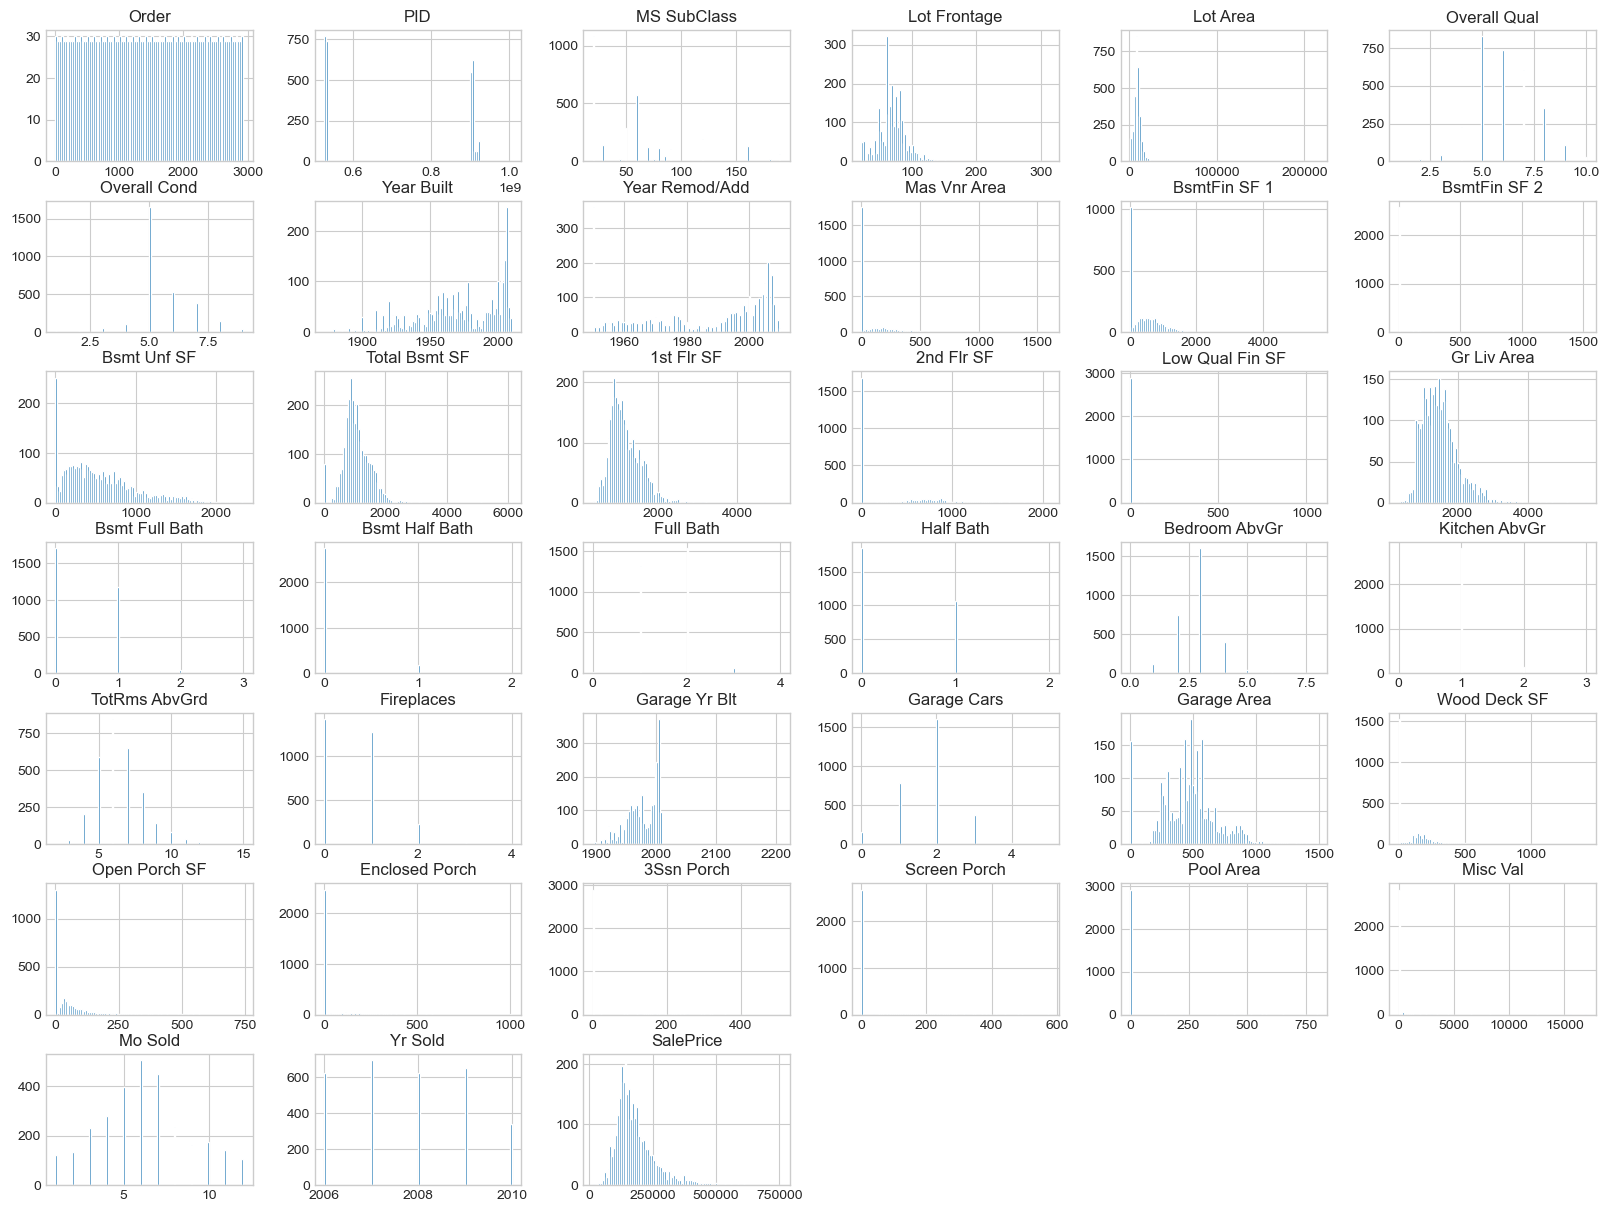

In [7]:
# Plot histogram of the datatypes which are numeric
df.hist(bins=100, figsize=(20,15))
plt.show()

### Observation on "Order" Field:
* Field Description: The "Order" field represents the observation number of each house in the dataset.
* Relevance: It appears that the order in which the survey was conducted does not have a direct impact on the price of the house.
* Decision: I will keep this field for now but plan to drop it after performing Exploratory Data Analysis (EDA) to confirm whether it is irrelevant to the model.

### Analysis on "PID" Field:
Field Description: The "PID" field contains the parcel identification number (also known as parcel ID, geo/map reference number, or PIN).

What is PID?: It is a unique 10-digit number assigned to each tax parcel by the Ames Assessor. The format is typically XX-XX-XXX-XXX, which breaks down as:

XX: Township
XX: Section
XXX: Block
XXX: Parcel
Usefulness: Given that the "PID" contains geographical references (township, section, block), it could provide valuable insights into the location-based features that may affect house prices.

I plan to extract and create new features based on the "PID" number, including variables like the town, section, and block, to enhance our model.

Reference: https://www.storycountyiowa.gov/FAQ.aspx?QID=169#:~:text=FAQs-,What%20is%20a%20parcel%20number?,Geo%20Numbering%20in%20Story%20County

#### Let's check our `SalePrice` column

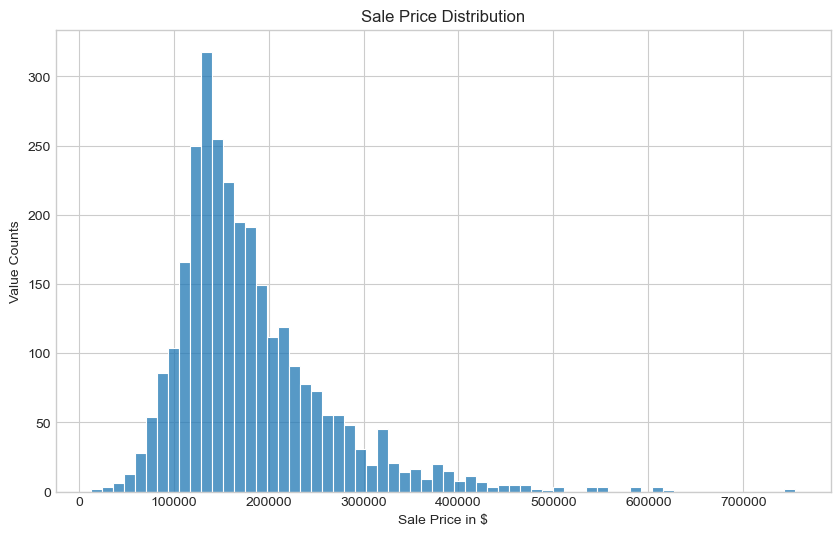

In [8]:
plt.figure(figsize = (10, 6))
sns.histplot(df['SalePrice'])
plt.xlabel("Sale Price in $")
plt.ylabel("Value Counts")
plt.title("Sale Price Distribution")
plt.show()

In [9]:
# These are the numeric columns in our df
df.select_dtypes(include=['number']).columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [10]:
# Lets check for null values
df.isna().sum().sort_values(ascending = False).head(30)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
Lot Shape            0
Street               0
Lot Area             0
dtype: int64

## Filling null values: 

Let's have a look at the features with the most null values

* `Pool QC`: Pool quality           
* `Misc Feature`: Miscellaneous feature not covered in other categories
* `Alley`: Type of alley access to property
* `Fence`: Fence quality
* `Mas Vnr Type`: Masonry veneer type
* `Fireplace Qu`: Fireplace quality
* `Lot Frontage`: Linear feet of street connected to property        
* `Garage Qual`: Garage quality
* `Garage Yr Blt`: Year garage was built
* `Garage Cond`: Garage condition
* `Garage Finish`: Interior finish of the garage
* `Garage Type`: Garage location
* `Bsmt Exposure`: Refers to walkout or garden level walls     
* `BsmtFin Type 2`: Type 2 finished square feet
* `Bsmt Qual`: Evaluates the height of the basement           
* `Bsmt Cond`: Evaluates the general condition of the basement   
* `BsmtFin Type 1`: Rating of basement finished area  
* `Mas Vnr Area`: Masonry veneer area in square feet  

#### For categorical features: 

Features like `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace Qu`, `Garage Qual`, `Garage Cond`, `Garage Finish`, `Garage Type`, `Bsmt Exposure`, `BsmtFin Type 2`, `Bsmt Qual`, `Bsmt Cond`, `BsmtFin Type 1`, and `Mas Vnr Type` have null values. We can make a safe assumption that if Pool QC or Misc Feature is Null it means the house does not have a pool or any other miscellaneous feature not covered in other categories so we will fill them with None.

#### For numerical features:

* Basement-related features (`Bsmt Full Bath`, `Bsmt Half Bath`, `Total Bsmt SF`, `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`): If missing, it is safe to assume that there is no basement so we will fill it with 0
* Garage-related features (`Garage Area`, `Garage Cars`, `Garage Yr Blt`): If missing, the house has no garage so we will fill it with 0.
* `Lot Frontage`: Since lot size varies by neighborhood, missing values will be filled with the median per neighborhood.
* `Electrical`: Only one missing value; it will be filled with the most common value (mode()).

In [11]:
categorical_features_with_null = ["Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu", "Garage Qual",
                        "Garage Cond", "Garage Finish", "Garage Type", "Bsmt Exposure", "BsmtFin Type 2",
                        "Bsmt Qual", "Bsmt Cond", "BsmtFin Type 1", "Mas Vnr Type"]

for col in categorical_features_with_null:
    df[col] = df[col].fillna("None")

In [12]:
df['Bsmt Qual'].isna().sum()

np.int64(0)

In [13]:
df.isna().sum().sort_values(ascending = False)

Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [14]:
# Fill with year built since if the house has a garage it was probably built at time of construction
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(df["Year Built"])

In [15]:
# Fill with 0 as if its null it probably means it doesn't exist
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [16]:
# FIll with median grouped with Neighbourhood so that we get local median of that neighbourhood 
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda x: x.fillna(x.median()))

In [17]:
# Even then there were 3 values with null so I filled them with total median of the col
df["Lot Frontage"] = df["Lot Frontage"].fillna(df["Lot Frontage"].median())

In [18]:
# Fill with 0 as if its null it probably means it doesn't exist
bsmt_features = ["Bsmt Full Bath", "Bsmt Half Bath", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 1", "BsmtFin SF 2"]
df[bsmt_features] = df[bsmt_features].fillna(0)

In [19]:
# Fill with 0 as if its null it probably means it doesn't exist
df["Garage Cars"] = df["Garage Cars"].fillna(0)
df["Garage Area"] = df["Garage Area"].fillna(0)

In [20]:
# Fill with 0 as if its null it probably means it doesn't exist
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

In [21]:
df.isna().sum().sort_values(ascending = False).head(30)

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
dtype: int64

### Encoding Data
Now that we've filled all our null values, let's convert all non-numeric columns using `LabelEncoder` and `OneHotEncoder`. Before that I will make a copy of the filled dataframe just so we can keep our data safe.

In [22]:
df_unencoded = df.copy()

Now that we have created a copy of our dataset, we can safely proceed with encoding categorical features and extracting relevant features without modifying the original data.

We will also be dropping a few columns which I feel are irrelavent features and which would not contribute to the price of the house

We have both Categorical Features and Ordered Features in our dataset.

I will use `LabelEncoder` for Ordered Features and `OneHotEncoder` for Categorical Features

#### Categorical Features:

* `MS Zoning`, `Street`, `Alley`, `Lot Config`, `Land Contour`, `Land Slope`, `Neighborhood`, `Condition 1`, `Condition 2`, `Bldg Type`, `House Style`, `Roof Matl`, `Exterior 1st`, `Exterior 2nd`,  `Roof Style`, `Foundation`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Central Air`, `Electrical`, `Garage Type`, `Garage Finish`, `Misc Feature`, `Sale Type`, `Sale Condition`, `Heating`

#### Ordered Features
* `Lot Shape`, `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Heating QC`, `Kitchen Qual`, `Functional`, `Garage Qual`, `Garage Cond`, `Paved Drive`, `Pool QC`, 

In [23]:
# To check if 'Street' is a ordered or a categorical feature
df.Street.value_counts()

Street
Pave    2918
Grvl      12
Name: count, dtype: int64

In [24]:
# Get value counts of MS Zoning
df['MS Zoning'].value_counts()

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

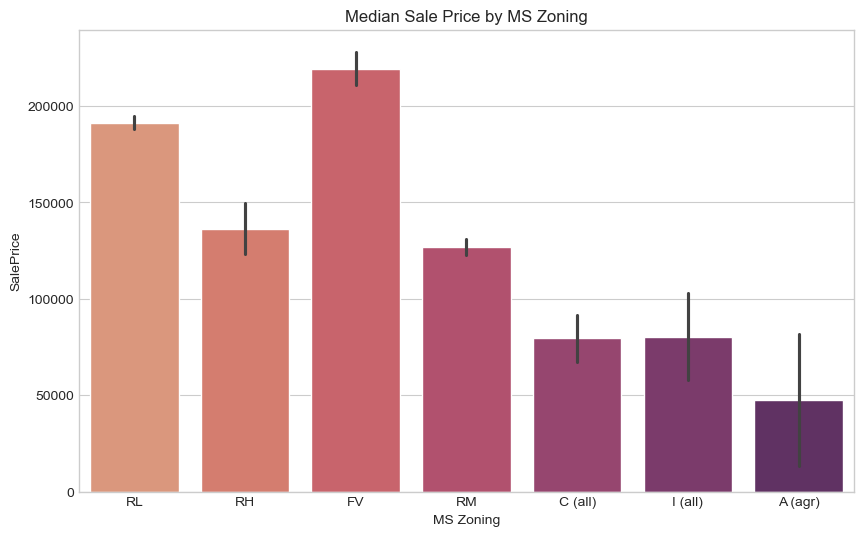

In [25]:
# Plot to check if 'MS Zoning' has any effect on Sale Price 
plt.figure(figsize=(10, 6))
sns.barplot(x=df['MS Zoning'], y=df['SalePrice'], estimator=np.mean, palette = 'flare', hue = df['MS Zoning'])
plt.title('Median Sale Price by MS Zoning')
plt.show()

We will check if columns are ordered or categorical

In [26]:
df['Alley'].value_counts()

Alley
None    2732
Grvl     120
Pave      78
Name: count, dtype: int64

In [27]:
df["Has_Alley"] = df["Alley"].apply(lambda x: 0 if x == "None" else 1)

In [28]:
correlation_alley = df[["Has_Alley", "SalePrice"]].corr()
print(correlation_alley)

           Has_Alley  SalePrice
Has_Alley   1.000000  -0.122036
SalePrice  -0.122036   1.000000


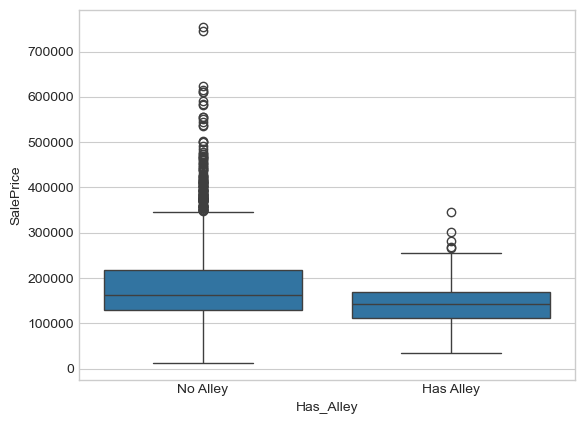

In [29]:
sns.boxplot(x=df["Has_Alley"], y=df["SalePrice"])
plt.xticks([0, 1], ["No Alley", "Has Alley"])
plt.show()

In [30]:
df.drop(columns=['Alley'], inplace = True)

In [31]:
df.groupby("Has_Alley")["SalePrice"].describe()

,count,mean,std,min,25%,50%,75%,max
Has_Alley,,,,,,,,
0,2732.0,183420.164348,81135.712696,12789.0,130000.0,163000.0,217000.0,755000.0
1,198.0,144588.722222,47042.958340,35000.0,111875.0,143550.0,170000.0,345000.0


In [32]:
df['Lot Shape'].value_counts()

Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64

In [33]:
lotshape_mapping = {
    "Reg": 1, 
    "IR1": 2, 
    "IR2": 3, 
    "IR3": 4
}

df["Lot Shape"] = df["Lot Shape"].map(lotshape_mapping)

In [34]:
df['Land Contour'].value_counts()

Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64

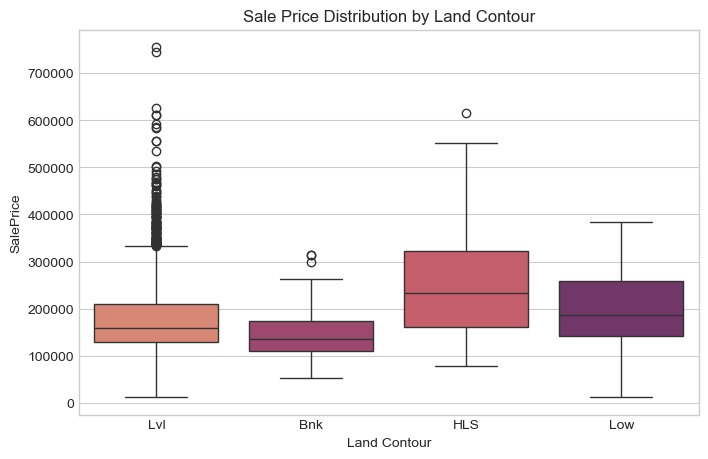

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Land Contour"], y=df["SalePrice"], order=["Lvl", "Bnk", "HLS", "Low"], palette= 'flare', hue = df["Land Contour"])
plt.title("Sale Price Distribution by Land Contour")
plt.show()

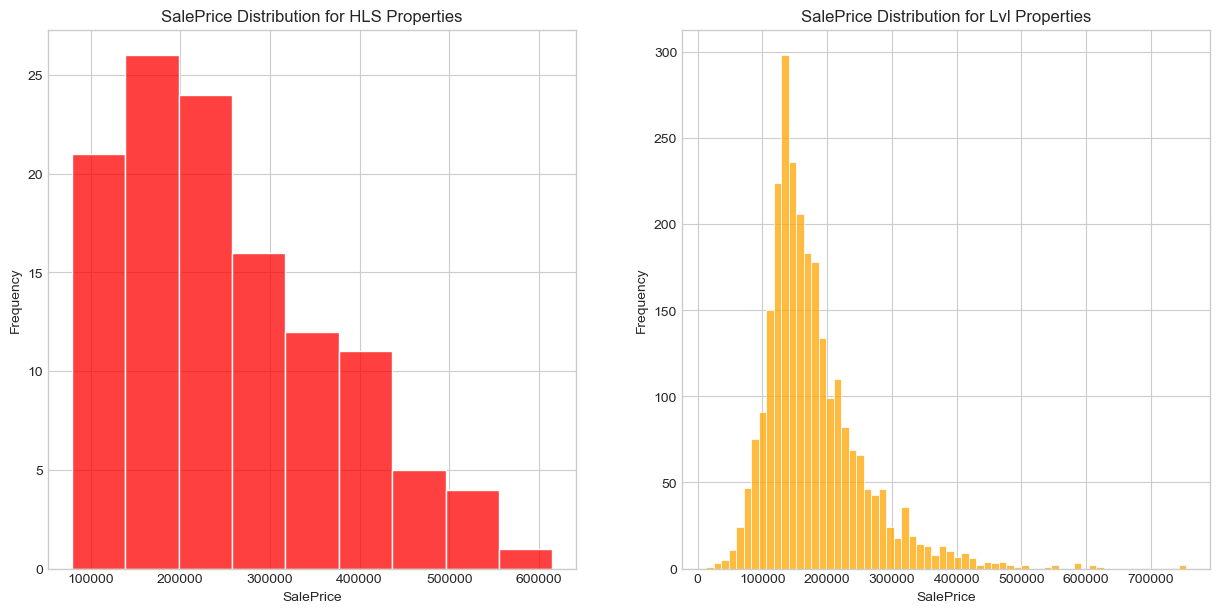

In [36]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot for HLS properties
sns.histplot(df[df["Land Contour"] == "HLS"]["SalePrice"], color='red', ax=ax[0])
ax[0].set_title("SalePrice Distribution for HLS Properties")
ax[0].set_xlabel("SalePrice")
ax[0].set_ylabel("Frequency")

# Plot for Lvl properties
sns.histplot(df[df["Land Contour"] == "Lvl"]["SalePrice"], color='orange', ax=ax[1])
ax[1].set_title("SalePrice Distribution for Lvl Properties")
ax[1].set_xlabel("SalePrice")
ax[1].set_ylabel("Frequency")

# Show the plot
plt.show()

### Analysis of Land Contour and SalePrice:
The plot comparing the SalePrice distribution across different Land Contour categories (Lvl, Bnk, HLS, and Low) reveals some key findings:

More Outliers in Lvl:

* Lvl (Level land) has a larger number of outliers in the SalePrice distribution. This indicates that there are several extremely high-priced properties in the dataset.
* The outliers in Lvl suggest that some properties on level land are much more expensive than others, potentially due to luxury homes, large estates, or properties with special features (e.g., prime location, high-end finishes).

#### Hillside (HLS) Properties:

While we might have expected HLS (Hillside) properties to be more expensive due to their potential views or uniqueness, the dataset has very few HLS properties to draw any strong conclusions from.
The HLS category has a much smaller number of entries, so it is underrepresented in the dataset, which limits our ability to assess its true pricing trend accurately.

Assumption on Property Prices:

* The assumption that HLS properties would be more expensive doesn’t hold strongly in this case because the amount of HLS data is too small to make meaningful conclusions.
* In contrast, Lvl properties are far more abundant and show a significant number of high-priced outliers, which could indicate that level land is home to more expensive properties overall.

Given the current dataset, Lvl properties appear to have a wider price range, but the small sample size for HLS makes it difficult to compare the pricing of these land types reliably.

The reason why I wanted to analyze this is to check if they are ordinal variables or categorical variables so I can encode them accordingly.

In [37]:
df.Utilities.value_counts()

Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

In [38]:
# Encode Utilites
df["Utilities_num"] = df["Utilities"].map({"AllPub": 1, "NoSewr": 0, "NoSeWa": 0})

In [39]:
correlation_utility = df[['Utilities_num', 'SalePrice']].corr()
print(correlation_utility)

               Utilities_num  SalePrice
Utilities_num       1.000000   0.031032
SalePrice           0.031032   1.000000


In [40]:
# Drop since it has low correlation
df.drop(columns=["Utilities", "Utilities_num"], inplace=True)

In [41]:
df['Lot Config'].value_counts()

Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64

Since there are only 5 values in `Lot Config` and there is no particular order to which is better we will use One-Hot Encoder to encode them.

In [42]:
df['Land Slope'].value_counts()

Land Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64

In [43]:
# Encode Land Slope
df["Land_Slope_encoded"] = df["Land Slope"].map({"Gtl": 0, "Mod": 1, "Sev": 2})

# Check correlation with SalePrice
corr_landslope = df[['Land_Slope_encoded', 'SalePrice']].corr()
print(corr_landslope)

                    Land_Slope_encoded  SalePrice
Land_Slope_encoded            1.000000   0.066396
SalePrice                     0.066396   1.000000


This shows that Land Slope doesn't really have a high correlation with `SalePrice` but since we might try running the dataset on RandomForestRegressor we might find more relations later. I will not drop Land Slope, but I will drop the `Land_Slope_Encoded` since the ranking might confuse linear models. 

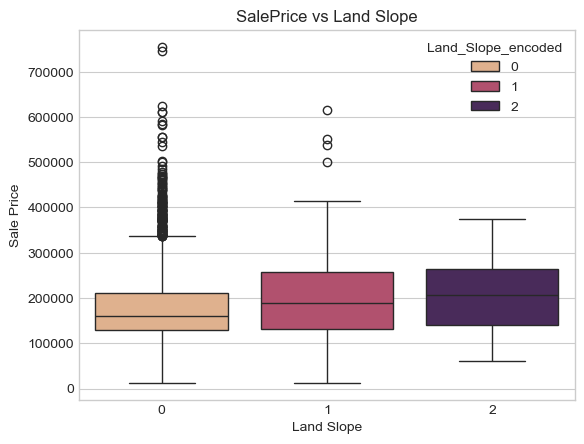

In [44]:
# Plot a box plot of 'Land_Slope_encoded' vs 'SalePrice'
sns.boxplot(x='Land_Slope_encoded', y='SalePrice', data=df, palette = 'flare', hue = 'Land_Slope_encoded')
plt.title('SalePrice vs Land Slope')
plt.xlabel('Land Slope')
plt.ylabel('Sale Price')
plt.show()


In [45]:
df.drop(columns = ['Land_Slope_encoded'], inplace = True)

<Axes: xlabel='Neighborhood'>

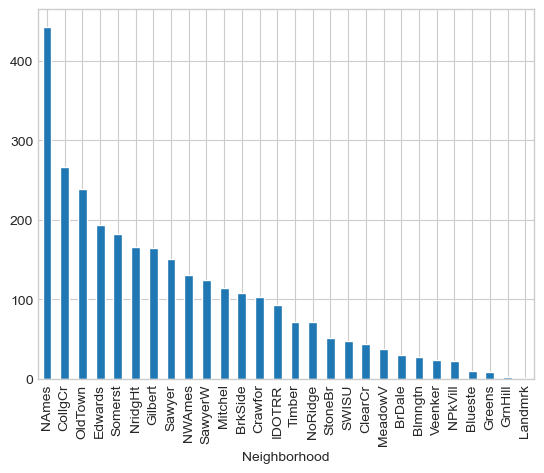

In [46]:
df['Neighborhood'].value_counts().plot(kind= 'bar')

The Neighborhood feature will definitely have an impact on the housing price, as different neighborhoods tend to have varying property values. However, there is no inherent ranking or order between neighborhoods. Hence we will consider it as a categorical variable.

<Axes: xlabel='Condition 1'>

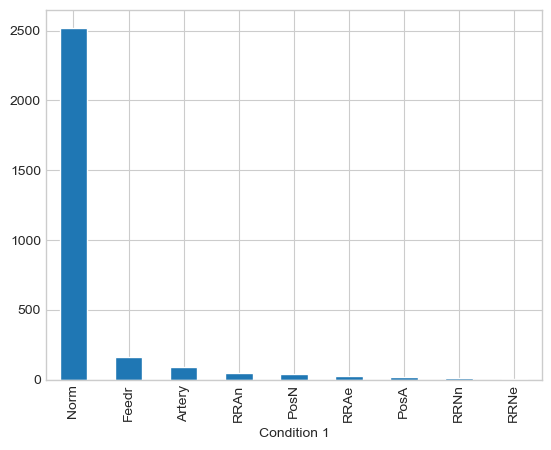

In [47]:
df['Condition 1'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Condition 2'>

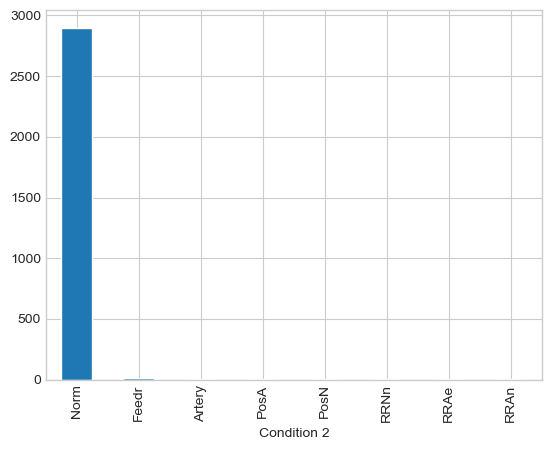

In [48]:
df['Condition 2'].value_counts().plot(kind = 'bar')

It seems like there is no inherent ranking here too, we will consider `Condition 1` and `Condition 2` as categorical variable.  We will also combine feature with `value_count < 10` as Other so that our model can have an easier time 

Approach:
1. Combine Categories with Low Frequency: Any category with fewer than 10 occurrences will be replaced with the label "Other".
2. One-Hot Encoding: After combining rare categories, we will apply One-Hot Encoding to both Condition 1 and Condition 2 to convert them into binary features that the model can interpret.

In [49]:
# Function to combine rare categories
def combine_rare_categories(df, column, threshold=10):
    """
    Combines rare categories in a specified column into a new 'Other' category. 
    Categories with a frequency less than the specified threshold are considered rare.

    Args:
    df (pd.DataFrame): The input DataFrame containing the column to transform.
    column (str): The column in the DataFrame where rare categories will be combined.
    threshold (int, optional): The frequency threshold below which categories will be combined into 'Other'. Default is 10.

    Returns:
    pd.DataFrame: The DataFrame with the transformed column where rare categories have been replaced by 'Other'.
    """
    value_counts = df[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    df[column] = df[column].replace(rare_categories, 'Other')
    return df


In [50]:
df = combine_rare_categories(df, 'Condition 1')

In [51]:
df = combine_rare_categories(df, 'Condition 2')

In [52]:
df['Condition 1'].value_counts()

Condition 1
Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
Other       15
Name: count, dtype: int64

In [53]:
df['Bldg Type'].value_counts()

Bldg Type
1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: count, dtype: int64

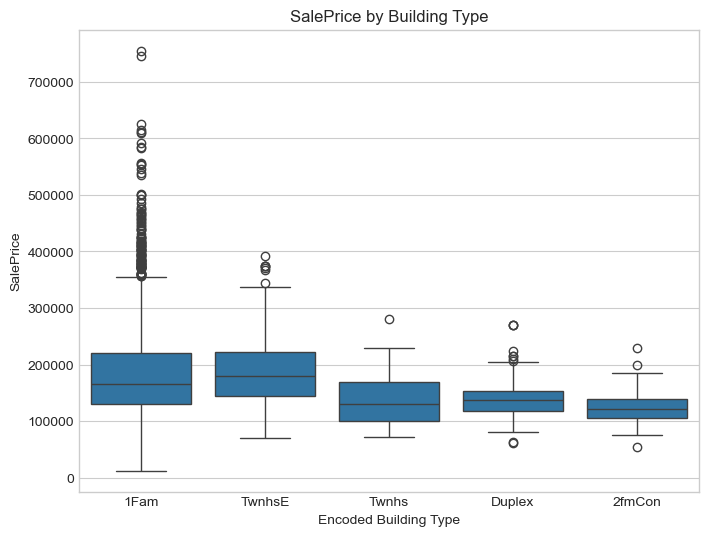

In [54]:
# Plot the encoded values vs SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bldg Type', y='SalePrice', data=df)
plt.title('SalePrice by Building Type')
plt.xlabel('Encoded Building Type')
plt.ylabel('SalePrice')
plt.show()

We can see that houses which are in 1fam category have more outliers, I will handle outliers later by applying log transformations. But I will consider building type as categorical variables now. 

In [55]:
df['House Style'].value_counts()

House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

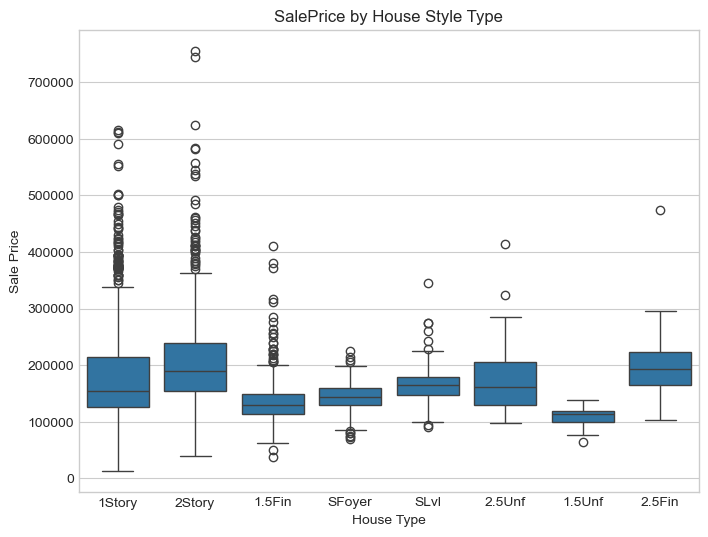

In [56]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'House Style', y = 'SalePrice', data = df)
plt.title('SalePrice by House Style Type')
plt.xlabel('House Type')
plt.ylabel('Sale Price')
plt.show()

In [57]:
df['Roof Matl'].value_counts()

Roof Matl
CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: count, dtype: int64

In [58]:
df = combine_rare_categories(df, 'Roof Matl')

In [59]:
df['Roof Matl'].value_counts()

Roof Matl
CompShg    2887
Tar&Grv      23
Other        20
Name: count, dtype: int64

In [60]:
df['Exterior 1st'].value_counts()

Exterior 1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
PreCast       1
ImStucc       1
Name: count, dtype: int64

In [61]:
df = combine_rare_categories(df, 'Exterior 1st')

In [62]:
df['Exterior 1st'].value_counts()

Exterior 1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
Other        14
Name: count, dtype: int64

In [63]:
df['Exterior 2nd'].value_counts()

Exterior 2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
PreCast       1
Other         1
Name: count, dtype: int64

In [64]:
df = combine_rare_categories(df, 'Exterior 2nd')

In [65]:
df['Exterior 2nd'].value_counts()

Exterior 2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Other        15
Name: count, dtype: int64

In [66]:
df['Mas Vnr Type'].value_counts()

Mas Vnr Type
None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

In [67]:
df.groupby("Mas Vnr Type")["SalePrice"].median()

Mas Vnr Type
BrkCmn     139000.0
BrkFace    186900.0
CBlock      80000.0
None       143000.0
Stone      245000.0
Name: SalePrice, dtype: float64

As we can see the median of Stone houses is pretty high, but the majority of values are None. Hence I will drop this column and `Mas Vnr Area`. 

In [68]:
df.drop(columns=['Mas Vnr Type', 'Mas Vnr Area'], inplace = True)

In [69]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Has_Alley
0,1,526301100,20,RL,141.0,31770,Pave,2,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,1,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,105000,0
2,3,526351010,20,RL,81.0,14267,Pave,2,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,2,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,189900,0


In [70]:
df['Exter Qual'].value_counts()

Exter Qual
TA    1799
Gd     989
Ex     107
Fa      35
Name: count, dtype: int64

`Exter Qual` represents the exterior quality of the house, ranked from Excellent to Fair. Since this is an ordinal variable, I will map the categories to numerical values to preserve their order.

The mapping will be: "Ex" = 5, "Gd" = 4, "TA" = 3, "Fa" = 2.

In [71]:
exter_qual_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
df["Exter Qual"] = df["Exter Qual"].map(exter_qual_mapping)

In [72]:
df['Exter Qual'].value_counts()

Exter Qual
3    1799
4     989
5     107
2      35
Name: count, dtype: int64

In [73]:
df['Exter Cond'].value_counts()

Exter Cond
TA    2549
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64

In [74]:
df["Exter Cond"] = df["Exter Cond"].map(exter_qual_mapping)
df['Exter Cond'].value_counts()

Exter Cond
3    2549
4     299
2      67
5      12
1       3
Name: count, dtype: int64

Exter Cond represents the exterior condition of the house, ranked from Excellent to Fair. Since this is an ordinal variable, I will map the categories to numerical values to preserve their order.

In [75]:
df['Foundation'].value_counts()

Foundation
PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64

In [76]:
df = combine_rare_categories(df, 'Foundation', 12)
df['Foundation'].value_counts()

Foundation
PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Other       16
Name: count, dtype: int64

In [77]:
df['Bsmt Qual'].value_counts()

Bsmt Qual
TA      1283
Gd      1219
Ex       258
Fa        88
None      80
Po         2
Name: count, dtype: int64

In [78]:
bsmt_qual_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "None": 0}  
df["Bsmt Qual"] = df["Bsmt Qual"].map(bsmt_qual_mapping)


In [79]:
df['Bsmt Qual'].value_counts()

Bsmt Qual
3.0    1283
4.0    1219
5.0     258
2.0      88
0.0      80
Name: count, dtype: int64

In [80]:
df['Bsmt Cond'].value_counts()

Bsmt Cond
TA      2616
Gd       122
Fa       104
None      80
Po         5
Ex         3
Name: count, dtype: int64

In [81]:
bsmt_cond_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
df["Bsmt Cond"] = df["Bsmt Cond"].map(bsmt_cond_mapping)
df['Bsmt Cond'].value_counts()

Bsmt Cond
3    2616
4     122
2     104
0      80
1       5
5       3
Name: count, dtype: int64

In [82]:
df['Bsmt Exposure'].value_counts()

Bsmt Exposure
No      1906
Av       418
Gd       284
Mn       239
None      83
Name: count, dtype: int64

In [83]:
df['BsmtFin Type 1'].value_counts()

BsmtFin Type 1
GLQ     859
Unf     851
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     80
Name: count, dtype: int64

In [84]:
df['BsmtFin Type 2'].value_counts()

BsmtFin Type 2
Unf     2499
Rec      106
LwQ       89
None      81
BLQ       68
ALQ       53
GLQ       34
Name: count, dtype: int64

In [85]:
df['Heating'].value_counts()

Heating
GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

In [86]:
df = combine_rare_categories(df, 'Heating')

In [87]:
df['Heating'].value_counts()

Heating
GasA     2885
GasW       27
Other      18
Name: count, dtype: int64

In [88]:
df['Heating QC'].value_counts()

Heating QC
Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: count, dtype: int64

Since this column has a clear ranking order 
* Po (Poor): 0
* Fa (Fair): 1
* Gd (Good): 2
* TA (Average): 3
* Ex (Excellent): 4

We will assign this order to the column

In [89]:
heating_qc_map = {"Ex": 4, "TA": 3, "Gd": 2, "Fa": 1, "Po": 0}
df['Heating QC'] = df['Heating QC'].map(heating_qc_map)

In [90]:
df['Heating QC'].value_counts()

Heating QC
4    1495
3     864
2     476
1      92
0       3
Name: count, dtype: int64

In [91]:
df['Electrical'].value_counts()

Electrical
SBrkr    2683
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [92]:
df['Kitchen Qual'].value_counts()

Kitchen Qual
TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: count, dtype: int64

Since this is an ordinal variable with the same ratings as the `Heating QC` column I will use the same map to change the values of `Kitchen Qual`

In [93]:
df['Kitchen Qual'] = df['Kitchen Qual'].map(heating_qc_map)
df['Kitchen Qual'].value_counts()

Kitchen Qual
3    1494
2    1160
4     205
1      70
0       1
Name: count, dtype: int64

In [94]:
df['Functional'].value_counts()

Functional
Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: count, dtype: int64

The `Functional` feature represents the condition of the house, with the following categories:

- **Typ**: Typical condition (best)
- **Min2**: Minor condition 2
- **Min1**: Minor condition 1
- **Mod**: Moderate condition
- **Maj1**: Major functional issues
- **Maj2**: Even worse than Maj1
- **Sev**: Severe issues
- **Sal**: Salvageable or beyond repair (worst)

Since `Maj2`, `Sev`, and `Sal` represent poor functionality and have very few instances (2-9 per category), we decided to **combine them into a single category** to prevent overfitting.

The mapping is as follows:
- **Maj2**, **Sev**, and **Sal** are all mapped to `0` (indicating poor functionality).
- Other categories are mapped to values from `3` (Maj1) to `7` (Typ), preserving the ordinal nature of the feature.

The final mapping used is:

| Category | Encoded Value |
|----------|---------------|
| Sal      | 0             |
| Sev      | 0             |
| Maj2     | 0             |
| Maj1     | 3             |
| Mod      | 4             |
| Min1     | 5             |
| Min2     | 6             |
| Typ      | 7             |

This encoding helps simplify the feature and avoid overfitting while preserving the ordinal relationships between the categories.


In [95]:
functional_map = {
    "Sal": 0,
    "Sev": 0,
    "Maj2": 0,
    "Maj1": 3,
    "Mod": 4,
    "Min1": 5,
    "Min2": 6,
    "Typ": 7
}
df['Functional'] = df['Functional'].map(functional_map)
df['Functional'].value_counts()

Functional
7    2728
6      70
5      65
4      35
3      19
0      13
Name: count, dtype: int64

In [96]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
None    1422
Gd       744
TA       600
Fa        75
Po        46
Ex        43
Name: count, dtype: int64

The `Fireplace Qu` also represents the quality of the fireplace with the following categories:

- **None**: No fireplace.
- **Po**: Poor quality fireplace.
- **Fa**: Fair quality fireplace.
- **TA**: Average quality fireplace.
- **Gd**: Good quality fireplace.
- **Ex**: Excellent quality fireplace.

Since the `Fireplace Qu` feature has an ordinal relationship (from "Ex" for excellent to "None" for no fireplace), we have decided to encode it as an ordinal variable.

In [97]:
fireplace_qu_map = {"None": 0,  "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df['Fireplace Qu'] = df['Fireplace Qu'].map(fireplace_qu_map)
df['Fireplace Qu'].value_counts()

Fireplace Qu
0    1422
4     744
3     600
2      75
1      46
5      43
Name: count, dtype: int64

In [98]:
df['Garage Type'].value_counts()

Garage Type
Attchd     1731
Detchd      782
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

In [99]:
df['Garage Qual'].value_counts()

Garage Qual
TA      2615
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: count, dtype: int64

In [100]:
garage_qual_map = {"None": 0,  "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
df['Garage Qual'] = df['Garage Qual'].map(garage_qual_map)
df['Garage Qual'].value_counts()

Garage Qual
3    2615
0     159
2     124
4      24
1       5
5       3
Name: count, dtype: int64

In [101]:
df['Paved Drive'].value_counts()

Paved Drive
Y    2652
N     216
P      62
Name: count, dtype: int64

Paved Drive
This feature indicates the type of driveway:

Y: Paved driveway.
P: Partially paved driveway.
N: Not paved driveway.
It will be encoded using Ordinal Encoding as follows:

* N → 0
* P → 1
* Y → 2

In [102]:
paved_drive_map = {
    'N': 0, 
    'P': 1,  
    'Y': 2   
}

df['Paved Drive'] = df['Paved Drive'].map(paved_drive_map)
df['Paved Drive'].value_counts()

Paved Drive
2    2652
0     216
1      62
Name: count, dtype: int64

In [103]:
df['Pool QC'].value_counts()

Pool QC
None    2917
Ex         4
Gd         4
TA         3
Fa         2
Name: count, dtype: int64

There are too many None values in this column, I will keep it for now and encode it in order and drop it later if corr is low

In [104]:
df['Pool Qc'] = df['Pool QC'].map(garage_qual_map)

In [105]:
df['Pool Qc'].value_counts()

Pool Qc
0    2917
5       4
4       4
3       3
2       2
Name: count, dtype: int64

In [106]:
df['Lot Shape'].value_counts()

Lot Shape
1    1859
2     979
3      76
4      16
Name: count, dtype: int64

In [107]:
df['Fence'].value_counts()

Fence
None     2358
MnPrv     330
GdPrv     118
GdWo      112
MnWw       12
Name: count, dtype: int64

The column `Fence` is an ordinal variable since it has ranking in the type of fence it has. We will encode it like this: 

* None → 0 (no fence)
* MnWw → 1 (minimum wood fence)
* MnPrv → 2 (minimum privacy fence)
* GdWo → 3 (good wood fence)
* GdPrv → 4 (good privacy fence)

In [108]:
fence_map = {"None": 0, "MnWw": 1, "MnPrv": 2, "GdWo": 3, "GdPrv": 4}
df['Fence'] = df['Fence'].map(fence_map)

In [109]:
df['Fence'].value_counts()

Fence
0    2358
2     330
4     118
3     112
1      12
Name: count, dtype: int64

In [110]:
df['Misc Feature'].value_counts()

Misc Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64

The Misc Feature column represents miscellaneous features that don't fit into other categories. The majority of the values are None, with a few indicating specific features (like a shed or a second garage).

Since most of the data is None, we will convert this column into a binary feature:

* 1: Property has a miscellaneous feature (e.g., shed, second garage, etc.).
* 0: Property does not have a miscellaneous feature.

In [111]:
df['Misc Feature'] = df['Misc Feature'].apply(lambda x: 1 if x != 'None' else 0)
df['Misc Feature'].value_counts()

Misc Feature
0    2824
1     106
Name: count, dtype: int64

In [112]:
df['Pool QC'].value_counts()

Pool QC
None    2917
Ex         4
Gd         4
TA         3
Fa         2
Name: count, dtype: int64

In [113]:
df['Pool QC'] = df['Pool QC'].map(garage_qual_map)

In [114]:
df['Pool QC'].value_counts()


Pool QC
0    2917
5       4
4       4
3       3
2       2
Name: count, dtype: int64

In [115]:
df['Sale Type'].value_counts()

Sale Type
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

In [116]:
df['Sale Condition'].value_counts()

Sale Condition
Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [117]:
df.select_dtypes(exclude=['number']).columns

Index(['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 'Garage Type',
       'Garage Finish', 'Garage Cond', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [118]:
df['Garage Cond'].value_counts()

Garage Cond
TA      2665
None     159
Fa        74
Gd        15
Po        14
Ex         3
Name: count, dtype: int64

In [119]:
df['Garage Cond'] = df['Garage Cond'].map(garage_qual_map)

In [120]:
df['Garage Cond'].value_counts()

Garage Cond
3    2665
0     159
2      74
4      15
1      14
5       3
Name: count, dtype: int64

### Encoding Categorical Features
Now that we've finished going through all the categorical variables, we can start encoding them using the `OneHotEncoder` and `ColumnTransformer` package from scikit-learn. This will convert the categorical variables into a format that can be fed into machine learning algorithms.

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [
    'MS Zoning', 'Street', 'Lot Config', 'Land Contour', 'Land Slope',
    'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Roof Style', 'Foundation',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Electrical',
    'Garage Type', 'Garage Finish', 'Misc Feature', 'Sale Type', 'Sale Condition',
    'Heating'
]

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop = 'first', sparse_output=  False), categorical_features)
    ]
)
df_encoded = column_transformer.fit_transform(df)
encoded_df = pd.DataFrame(df_encoded, columns = column_transformer.get_feature_names_out())
df_final = pd.concat([df.drop(categorical_features, axis = 1), encoded_df], axis = 1)

In [122]:
df_final.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice,Has_Alley,Pool Qc,cat__MS Zoning_C (all),cat__MS Zoning_FV,cat__MS Zoning_I (all),cat__MS Zoning_RH,cat__MS Zoning_RL,cat__MS Zoning_RM,cat__Street_Pave,cat__Lot Config_CulDSac,cat__Lot Config_FR2,cat__Lot Config_FR3,cat__Lot Config_Inside,cat__Land Contour_HLS,cat__Land Contour_Low,cat__Land Contour_Lvl,cat__Land Slope_Mod,cat__Land Slope_Sev,cat__Neighborhood_Blueste,cat__Neighborhood_BrDale,cat__Neighborhood_BrkSide,cat__Neighborhood_ClearCr,cat__Neighborhood_CollgCr,cat__Neighborhood_Crawfor,cat__Neighborhood_Edwards,cat__Neighborhood_Gilbert,cat__Neighborhood_Greens,cat__Neighborhood_GrnHill,cat__Neighborhood_IDOTRR,cat__Neighborhood_Landmrk,cat__Neighborhood_MeadowV,cat__Neighborhood_Mitchel,cat__Neighborhood_NAmes,cat__Neighborhood_NPkVill,cat__Neighborhood_NWAmes,cat__Neighborhood_NoRidge,cat__Neighborhood_NridgHt,cat__Neighborhood_OldTown,cat__Neighborhood_SWISU,cat__Neighborhood_Sawyer,cat__Neighborhood_SawyerW,cat__Neighborhood_Somerst,cat__Neighborhood_StoneBr,cat__Neighborhood_Timber,cat__Neighborhood_Veenker,cat__Condition 1_Feedr,cat__Condition 1_Norm,cat__Condition 1_Other,cat__Condition 1_PosA,cat__Condition 1_PosN,cat__Condition 1_RRAe,cat__Condition 1_RRAn,cat__Condition 2_Norm,cat__Condition 2_Other,cat__Bldg Type_2fmCon,cat__Bldg Type_Duplex,cat__Bldg Type_Twnhs,cat__Bldg Type_TwnhsE,cat__House Style_1.5Unf,cat__House Style_1Story,cat__House Style_2.5Fin,cat__House Style_2.5Unf,cat__House Style_2Story,cat__House Style_SFoyer,cat__House Style_SLvl,cat__Roof Matl_Other,cat__Roof Matl_Tar&Grv,cat__Exterior 1st_BrkFace,cat__Exterior 1st_CemntBd,cat__Exterior 1st_HdBoard,cat__Exterior 1st_MetalSd,cat__Exterior 1st_Other,cat__Exterior 1st_Plywood,cat__Exterior 1st_Stucco,cat__Exterior 1st_VinylSd,cat__Exterior 1st_Wd Sdng,cat__Exterior 1st_WdShing,cat__Exterior 2nd_Brk Cmn,cat__Exterior 2nd_BrkFace,cat__Exterior 2nd_CmentBd,cat__Exterior 2nd_HdBoard,cat__Exterior 2nd_ImStucc,cat__Exterior 2nd_MetalSd,cat__Exterior 2nd_Other,cat__Exterior 2nd_Plywood,cat__Exterior 2nd_Stucco,cat__Exterior 2nd_VinylSd,cat__Exterior 2nd_Wd Sdng,cat__Exterior 2nd_Wd Shng,cat__Roof Style_Gable,cat__Roof Style_Gambrel,cat__Roof Style_Hip,cat__Roof Style_Mansard,cat__Roof Style_Shed,cat__Foundation_CBlock,cat__Foundation_Other,cat__Foundation_PConc,cat__Foundation_Slab,cat__Bsmt Exposure_Gd,cat__Bsmt Exposure_Mn,cat__Bsmt Exposure_No,cat__Bsmt Exposure_None,cat__BsmtFin Type 1_BLQ,cat__BsmtFin Type 1_GLQ,cat__BsmtFin Type 1_LwQ,cat__BsmtFin Type 1_None,cat__BsmtFin Type 1_Rec,cat__BsmtFin Type 1_Unf,cat__BsmtFin Type 2_BLQ,cat__BsmtFin Type 2_GLQ,cat__BsmtFin Type 2_LwQ,cat__BsmtFin Type 2_None,cat__BsmtFin Type 2_Rec,cat__BsmtFin Type 2_Unf,cat__Central Air_Y,cat__Electrical_FuseF,cat__Electrical_FuseP,cat__Electrical_Mix,cat__Electrical_SBrkr,cat__Garage Type_Attchd,cat__Garage Type_Basment,cat__Garage Type_BuiltIn,cat__Garage Type_CarPort,cat__Garage Type_Detchd,cat__Garage Type_None,cat__Garage Finish_None,cat__Garage Finish_RFn,cat__Garage Finish_Unf,cat__Misc Feature_1,cat__Sale Type_CWD,cat__Sale Type_Con,cat__Sale Type_ConLD,cat__Sale Type_ConLI,cat__Sale Type_ConLw,cat__Sale Type_New,cat__Sale Type_Oth,cat__Sale Type_VWD,cat__Sale Type_WD,cat__Sale Condition_AdjLand,cat__Sale Condition_Alloca,cat__Sale Condition_Family,cat__Sale Condition_Normal,cat__Sale Condition_Partial,cat__Heating_GasW,cat__Heating_Other
0,1,526301100,20,141.0,31770

Since we have encoded all our columns we can store this data in an new csv_file and proceed with Visualizing Data and Extracting new Features 

In [123]:
df_final['Bsmt Qual'] = df_final['Bsmt Qual'].fillna(0)

In [124]:
df_final.to_csv("data/Ames_Housing_Clean.csv")